## Graphic utilities - multiple maps

AQUA is providing a simple tool to plot multiple maps to compare between.
This will generate a simple panel with the requested maps, by default represented as contour plots.
The colorbar is shared between all maps, and the color scale is set to the maximum and minimum values of all maps.
Many options are available to customize the appearance of the maps, such as the colormap, the contour levels, the title, the labels, etc (see the documentation of the `plot_maps` function for more details).

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua import Reader
from aqua.graphics import plot_maps, plot_maps_diff

In [3]:
reader = Reader(model="ERA5", exp="era5", source="monthly")
data = reader.retrieve(var='2t')
data

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 1008, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    2t       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Fri Apr 05 04:30:18 2024: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

As example we select 20 years of ERA5 data for 2t.
We plot in one panel the DJF mean, in another the JJA while in the last one the full year mean.The code will automatically detect vmin and vmax to share between figures and will also evaluate how many boxes are needed, so the user does not need to worry about it.

In [4]:
data_2000_2010 = data['2t'].sel(time=slice('2000', '2010'))

In [5]:
data_2000_2010_cycle = data_2000_2010.groupby('time.month').mean('time')
data_DJF = data_2000_2010_cycle.sel(month=[12, 1, 2]).mean('month')
data_JJA = data_2000_2010_cycle.sel(month=[6, 7, 8]).mean('month')
data_full = data_2000_2010.mean('time')

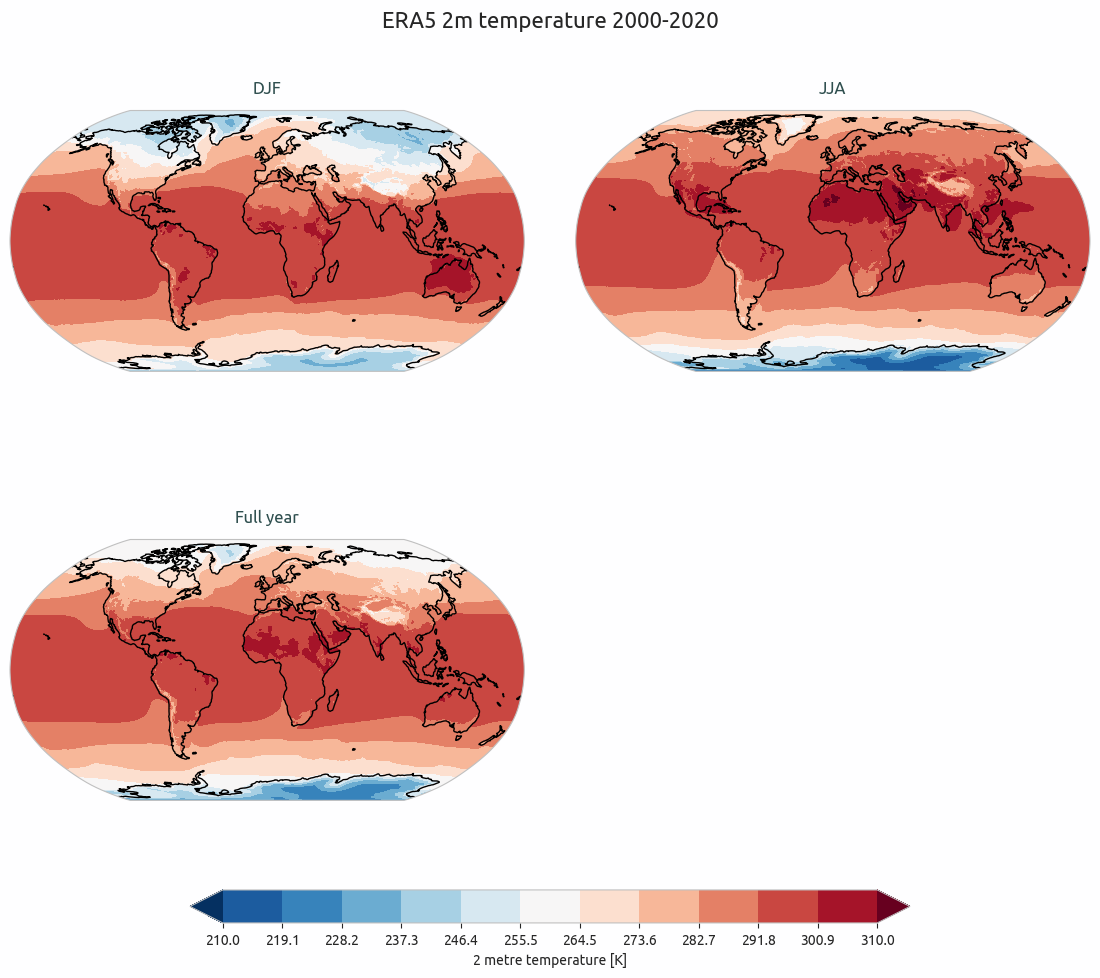

In [10]:
maps_list = [data_DJF, data_JJA, data_full]
titles = ['DJF', 'JJA', 'Full year']
title = 'ERA5 2m temperature 2000-2020'
plot_maps(maps=maps_list, titles=titles, title=title, nlevels=11, vmin=210, vmax=310)

There is also an additional function to plot multiple comparison maps, which is similar to the one above but allows to compare two datasets. This function is called `plot_maps_diff` and has a similar interface to `plot_sigle_map_diff`.

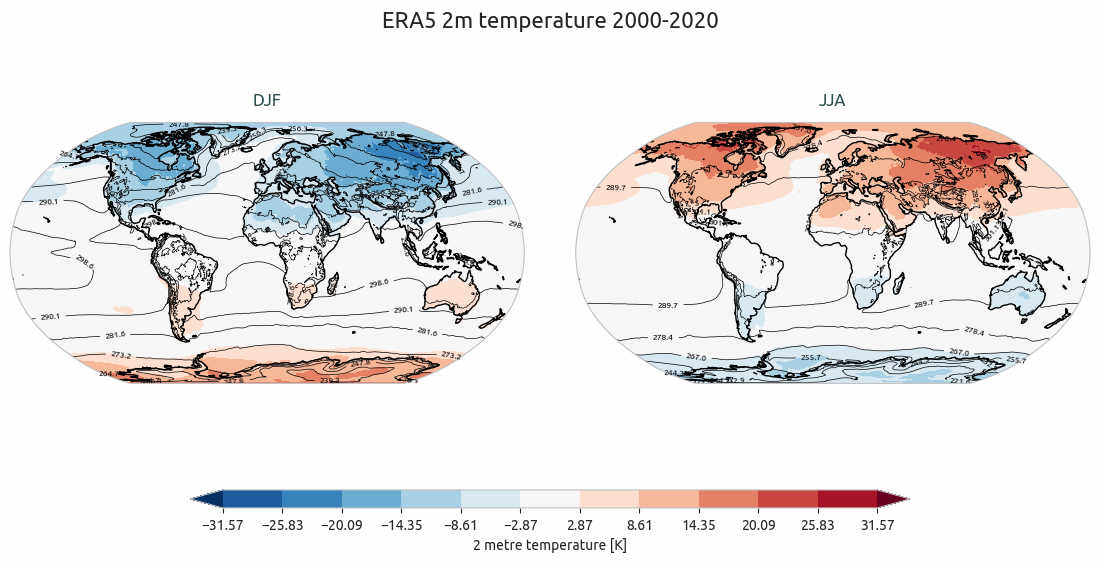

In [9]:
maps_list = [data_DJF, data_JJA]
ref_list = [data_full, data_full]
titles = ['DJF', 'JJA']
title = 'ERA5 2m temperature 2000-2020'
plot_maps_diff(maps=maps_list, maps_ref=ref_list, titles=titles, title=title, nlevels=11)